# Breast cancer detection (logistic regression python case)


## Dataset information
Our dataset was taken from the *UCI Machine Learning Repository* (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) and it contains the following **attribute information**:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

*The data was donated by the Original Wisconsin Breast Cancer Database*

Where we will try to use the Linear Regression model from *Scikit-learn* python library **to predict whether a tumor is malignant o benign** according to the given information.

## Importing the libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We split the dataset into:
- x: independent variables or predictors  
- y: dependent variable or prediction

In [38]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Breast Cancer detection using Logistic Regression/breast_cancer.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Checking for missing data

In [39]:
np.any(np.isnan(x))

False

In [40]:
np.any(np.isnan(y))

False

## Splitting the dataset into the Training set and Test set

We split the data into a training set (for fitting our model) and a test set (to test the predictions of our fitted model)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
y_pred[0:10]

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2])

Remember that: 
- 2 = benign
- 4 = malignant

In [45]:
comparison = np.concatenate((y_test.reshape(-1,1), y_pred.reshape(-1,1)), axis = 1)
comparison[0:10,:]

array([[2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2]])

## Making the Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


Below we can observe, in a more friendly way, the confusion matrix of our predictions using this model:

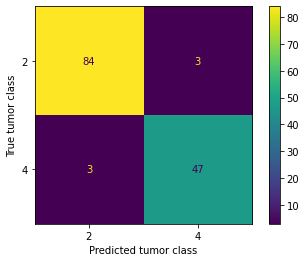

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.show()

## Computing the accuracy with k-Fold Cross Validation

Finally, we compute the accuracy and standard deviation of our model to see the way it performed to make the right tumor predictions.

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %


We got an accuracy of 96.70%, which is actually pretty good without tuning the hyperparameters too much. I hope you enjoyed this applied case of logistic regression on a topic as interesting as healthcare and I hope it inspires you to use this approach on your own dataset, now that you know the potential of this linear classification model.